In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X.shape: (26, 2)


/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


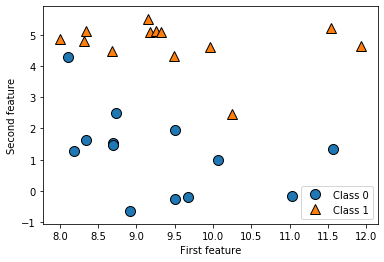

In [12]:

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

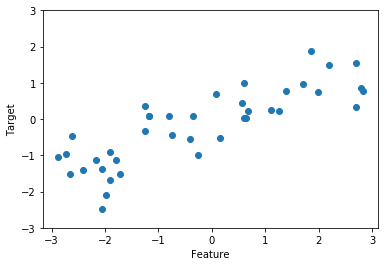

In [13]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [16]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [17]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [19]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


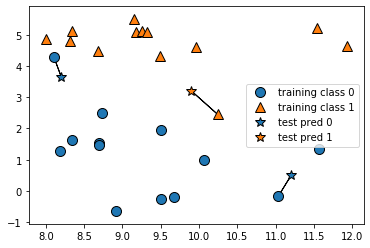

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


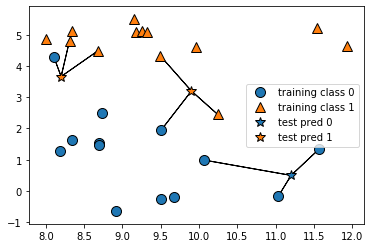

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [22]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)

print("Test set prdictions: {}".format(clf.predict(X_test)))

Test set prdictions: [1 0 1 0 1 0 0]


/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [23]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


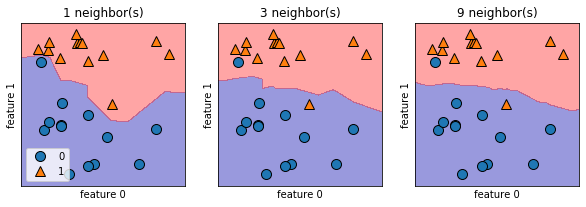

In [24]:
fig, axes = plt.subplots(1,3, figsize = (10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

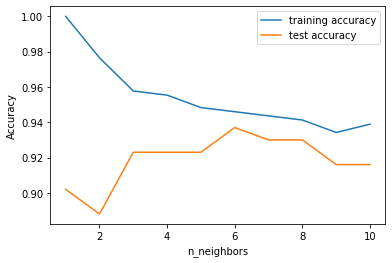

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

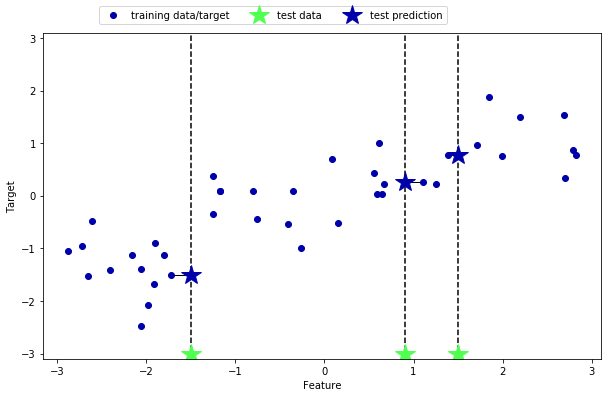

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

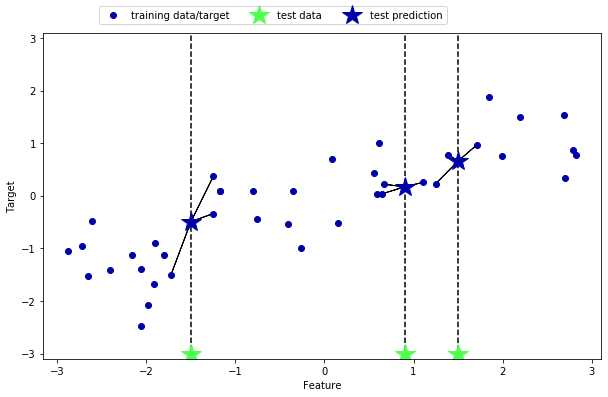

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


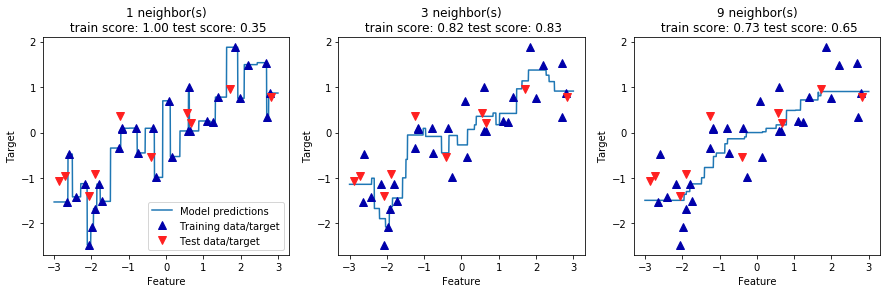

In [30]:
fig, axes = plt.subplots(1,3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")

w[0]: 0.393906  b: -0.031804


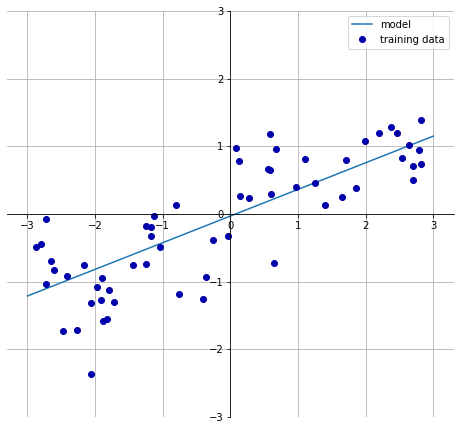

In [31]:
mglearn.plots.plot_linear_regression_wave()

In [32]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train) 

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [33]:
print("Training test score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training test score: 0.67
Test set score: 0.66


In [34]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("Training test score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training test score: 0.95
Test set score: 0.61


In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [36]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [37]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


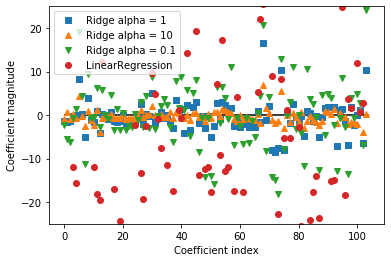

In [38]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

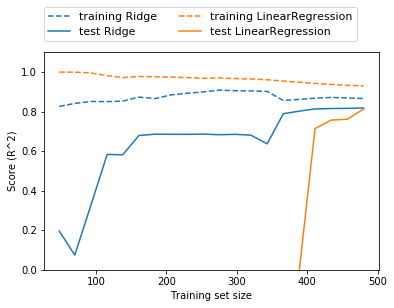

In [39]:
mglearn.plots.plot_ridge_n_samples()

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [41]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [42]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

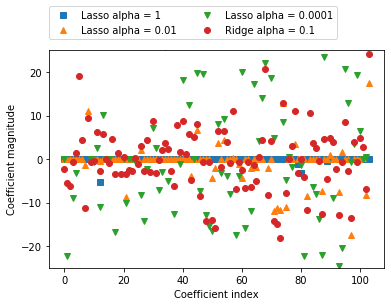

In [43]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


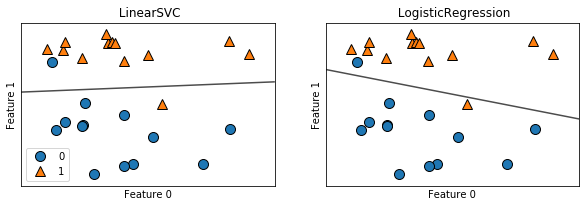

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip ([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(" {}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

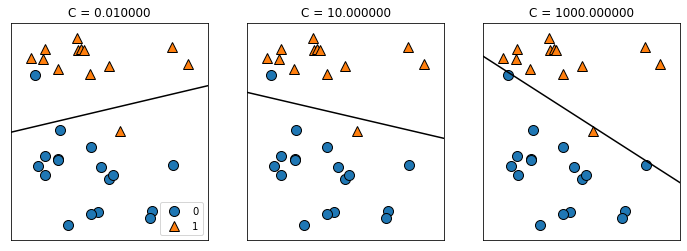

In [45]:
mglearn.plots.plot_linear_svc_regularization()

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [47]:
logreg100 = LogisticRegression(C = 100, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [48]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


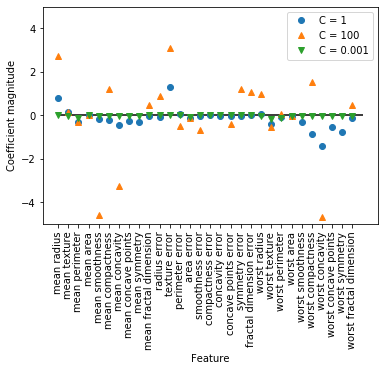

In [49]:
plt.plot(logreg.coef_.T, 'o', label = "C = 1")
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg001.coef_.T, 'v', label = "C = 0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C = 0.001: 0.91
Test accuracy of l1 logreg with C = 0.001: 0.92
Training accuracy of l1 logreg with C = 1.000: 0.96
Test accuracy of l1 logreg with C = 1.000: 0.96
Training accuracy of l1 logreg with C = 100.000: 0.99
Test accuracy of l1 logreg with C = 100.000: 0.98


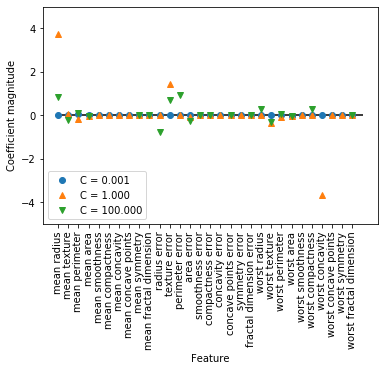

In [50]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = C, penalty = "l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C = {:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C = {:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc = 3)

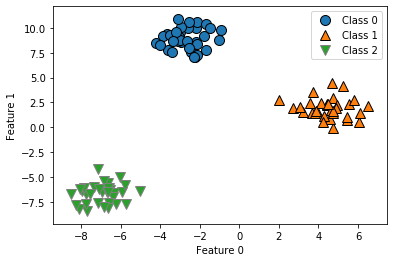

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0],X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [52]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


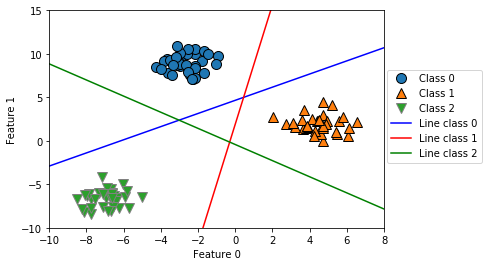

In [53]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))

Text(0, 0.5, 'Feature 1')

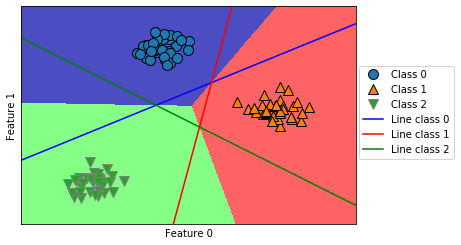

In [54]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [55]:
X = np.array([[0,1,0,1], [1,0,1,1],[0,0,0,1], [1,0,1,0]])
y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


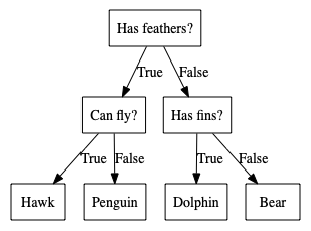

In [56]:
import mglearn
import graphviz
mglearn.plots.plot_animal_tree()

In [57]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [58]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [59]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"], feature_names = cancer.feature_names, impurity = False, filled = True)

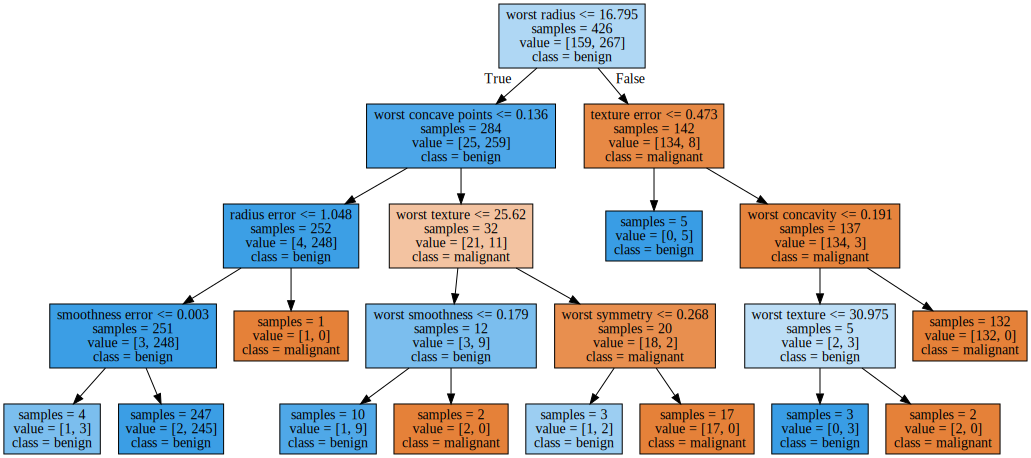

In [60]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [61]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot

In [62]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)


// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [63]:
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [65]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


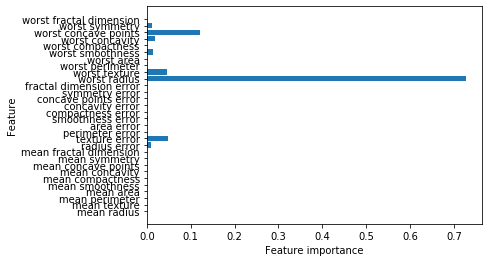

In [66]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


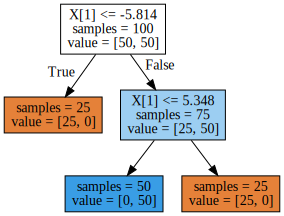

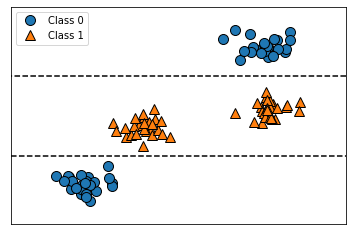

In [67]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

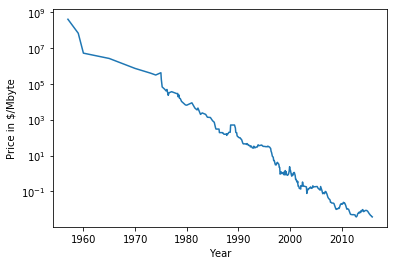

In [68]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [69]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

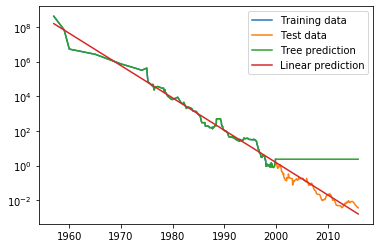

In [70]:
plt.semilogy(data_train.date, data_train.price, label = "Training data")
plt.semilogy(data_test.date, data_test.price, label = "Test data")
plt.semilogy(ram_prices.date, price_tree, label = "Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label = "Linear prediction")
plt.legend()

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

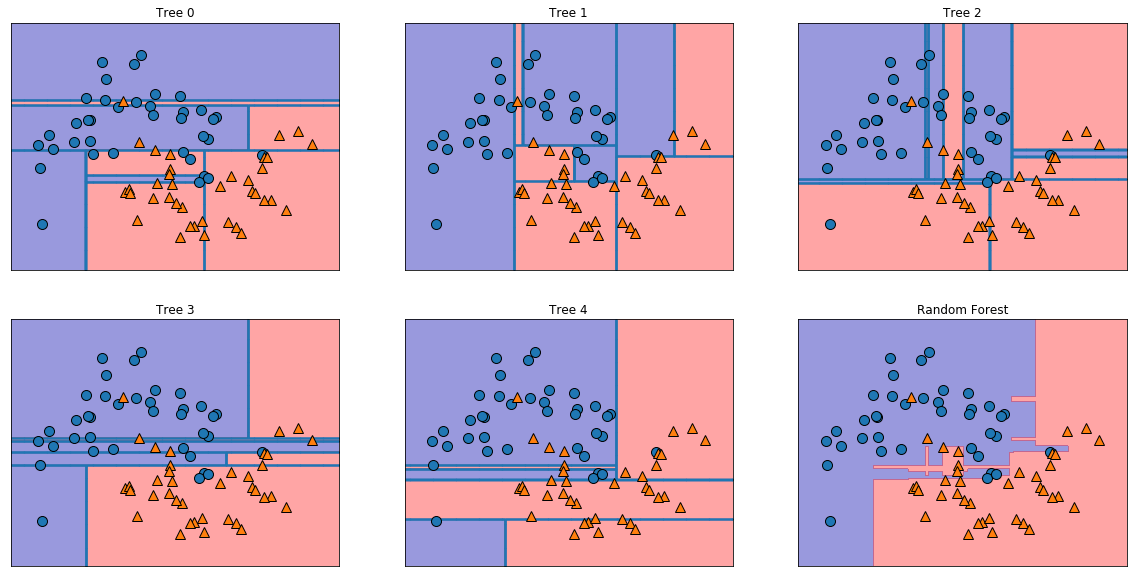

In [72]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax= axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


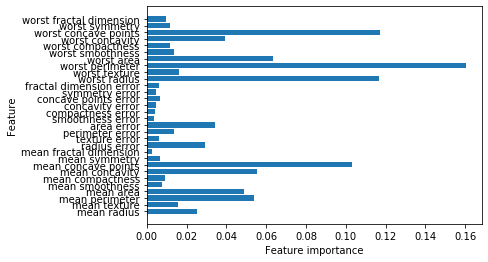

In [74]:
plot_feature_importances_cancer(forest)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [76]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [77]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


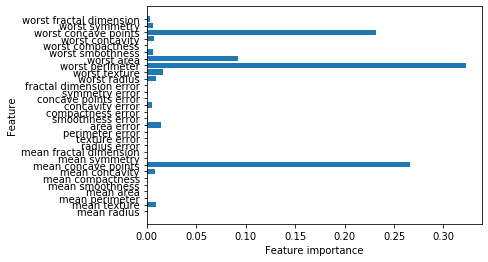

In [78]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

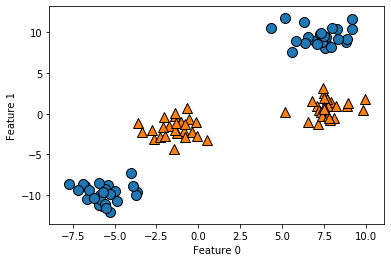

In [79]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

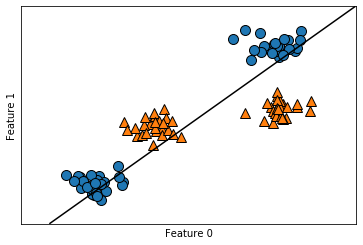

In [80]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

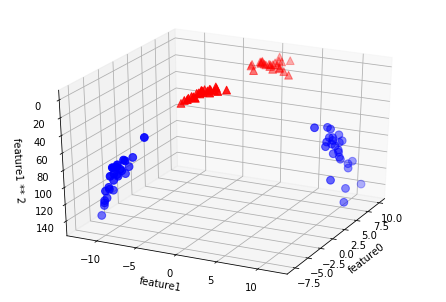

In [82]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev = -152, azim = -26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

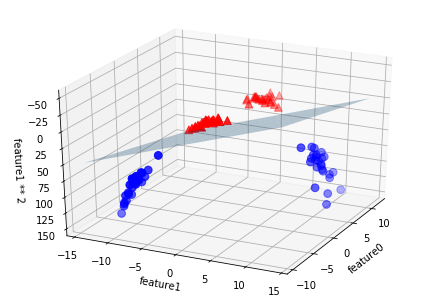

In [83]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

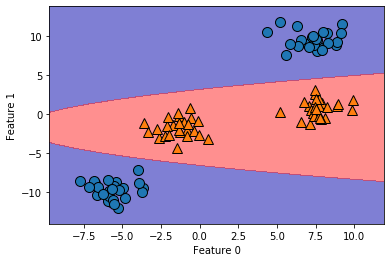

In [84]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

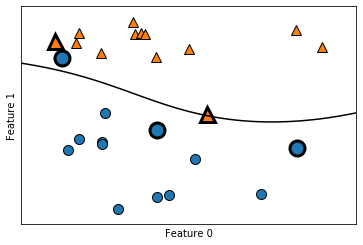

In [85]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

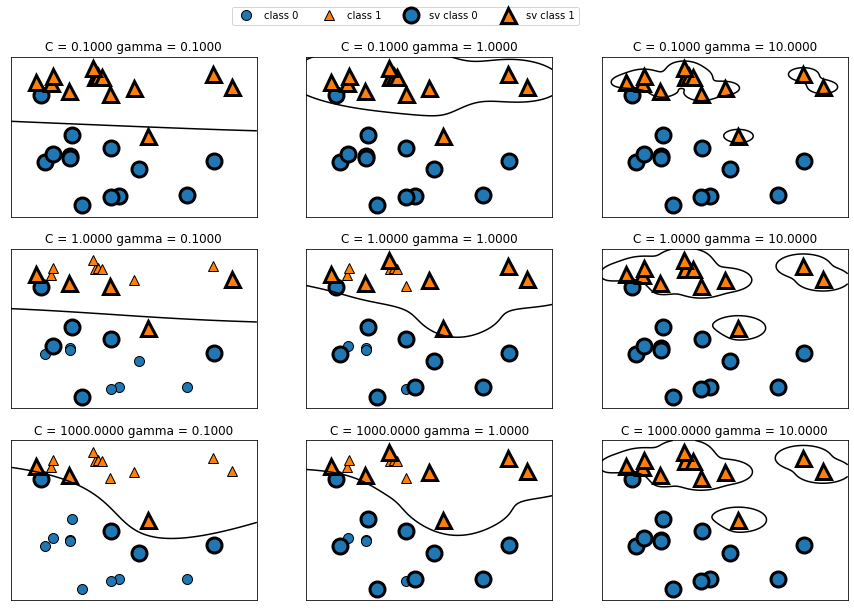

In [86]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C= C, log_gamma = gamma, ax = a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol = 4, loc = (.9, 1.2))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy of training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy of test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy of training set: 0.90
Accuracy of test set: 0.94


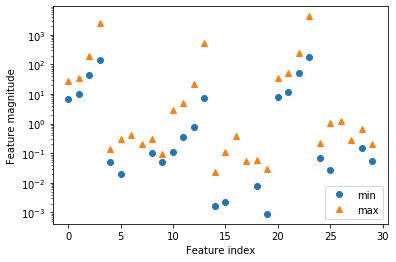

In [88]:
plt.plot(X_train.min(axis = 0), 'o', label = "min")
plt.plot(X_train.max(axis = 0), '^', label = "max")
plt.legend(loc = 4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [89]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis = 0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis = 0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis= 0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [90]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [91]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [92]:
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


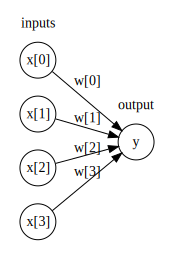

In [93]:
display(mglearn.plots.plot_logistic_regression_graph())

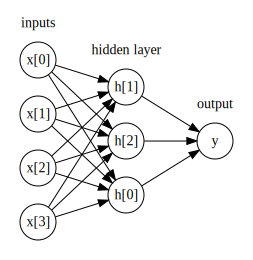

In [94]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

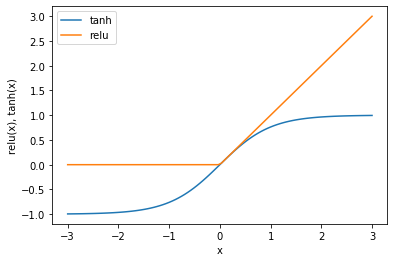

In [95]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), label = "relu")
plt.legend(loc = "best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

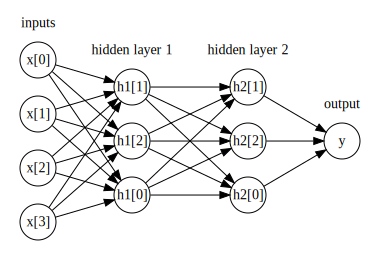

In [96]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

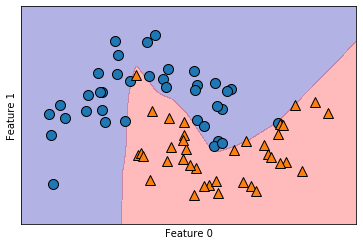

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

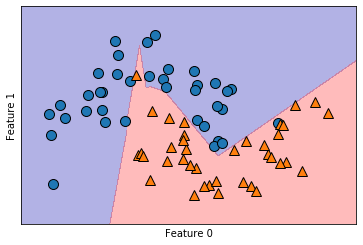

In [100]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10], max_iter = 100000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

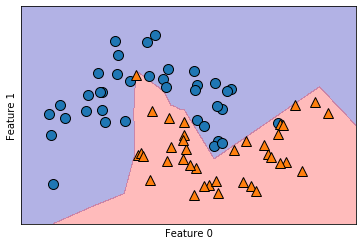

In [101]:
mlp = MLPClassifier(solver= 'lbfgs', random_state = 0, hidden_layer_sizes = [10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

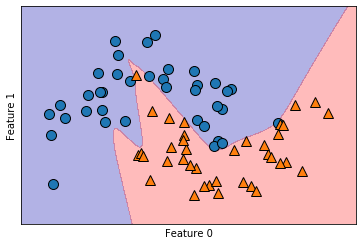

In [102]:
mlp = MLPClassifier(solver= 'lbfgs', activation = 'tanh', random_state = 0, hidden_layer_sizes = [10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

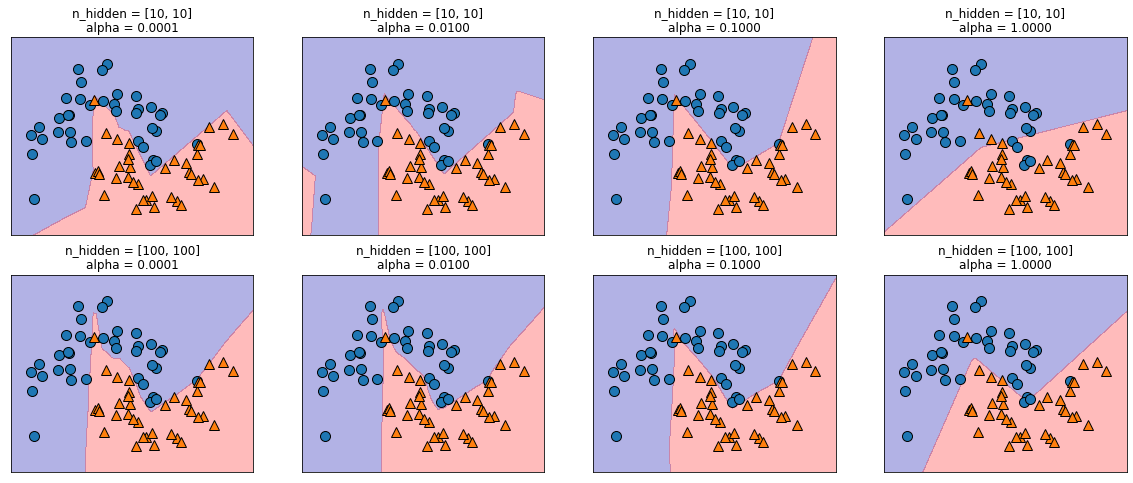

In [105]:
fig, axes = plt.subplots(2,4, figsize = (20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, max_iter = 100000, hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes], alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title("n_hidden = [{}, {}]\nalpha = {:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

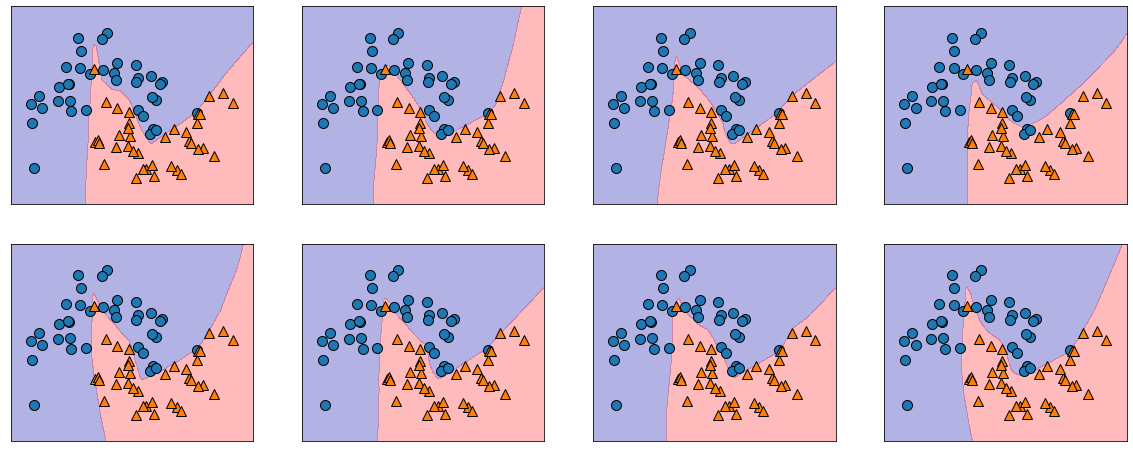

In [106]:
fig, axes = plt.subplots(2,4, figsize = (20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver = 'lbfgs', random_state = i, hidden_layer_sizes = [100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)

In [107]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis = 0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [108]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [109]:
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis = 0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/chikakomorimoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [110]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [111]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


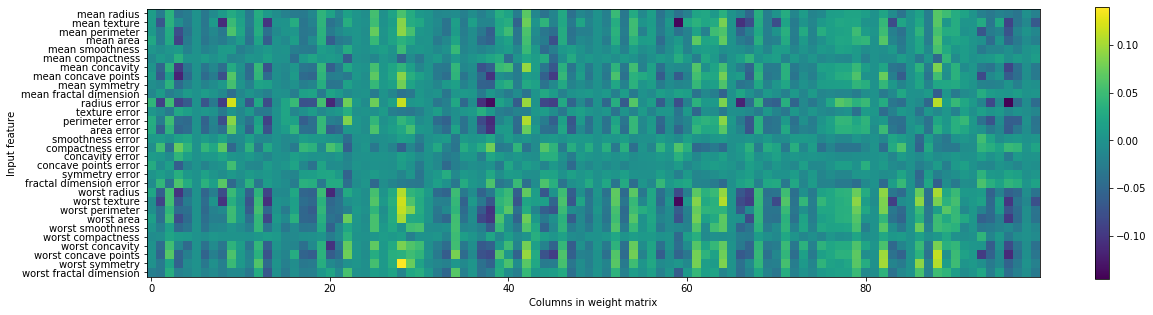

In [113]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state= 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [117]:
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [118]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [119]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [120]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


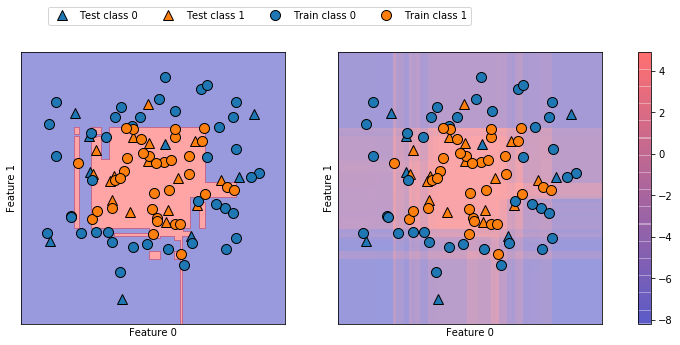

In [121]:
fig,axes =plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .4, cm = mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax= axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol = 4, loc = (.1, 1.1))

In [122]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [123]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


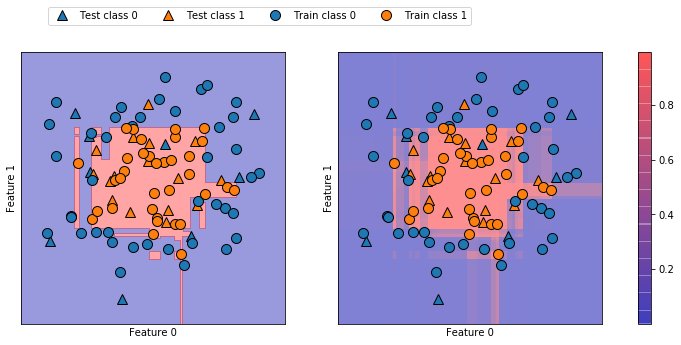

In [125]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .5, cm = mglearn.ReBl, function = 'predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax = axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol = 4, loc = (.1, 1.1))

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_set = train_test_split(iris.data, iris.target, random_state = 42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [127]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [128]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis = 1)))
print("predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [129]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis = 1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums: [1. 1. 1. 1. 1. 1.]


In [130]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis = 1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [131]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
